In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mushroom-dataset/mushroom_cleaned.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("mushroom_cleaned.csv")
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


The dataset provided consists of several columns, each representing different characteristics of mushrooms. Below is a detailed explanation of each column:

1. **cap-diameter**
    - **Description**: Represents the diameter of the mushroom cap.
2. **cap-shape**
    - **Description**: Represents the shape of the mushroom cap.
3. **gill-attachment**
    - **Description**: Indicates how the gills (spore-bearing structure) of the mushroom are attached to the stem.
4. **gill-color**
    - **Description**: Represents the color of the mushroom's gills.
5. **stem-height**
    - **Description**: Indicates the height of the mushroom stem.
6. **stem-width**
    - **Description**: Represents the width of the mushroom stem.
7. **stem-color**
    - **Description**: Represents the color of the mushroom's stem.
8. **season**
    - **Description**: Indicates the season during which the mushroom was found.
9. **class**
    - **Description**: Indicates whether the mushroom is poisonous or not.


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cap-diameter,54035.0,567.257204,359.883763,0.000000,289.000000,525.000000,781.000000,1891.000000
cap-shape,54035.0,4.000315,2.160505,0.000000,2.000000,5.000000,6.000000,6.000000
gill-attachment,54035.0,2.142056,2.228821,0.000000,0.000000,1.000000,4.000000,6.000000
gill-color,54035.0,7.329509,3.200266,0.000000,5.000000,8.000000,10.000000,11.000000
stem-height,54035.0,0.759110,0.650969,0.000426,0.270997,0.593295,1.054858,3.835320
stem-width,54035.0,1051.081299,782.056076,0.000000,421.000000,923.000000,1523.000000,3569.000000
stem-color,54035.0,8.418062,3.262078,0.000000,6.000000,11.000000,11.000000,12.000000
season,54035.0,0.952163,0.305594,0.027372,0.888450,0.943195,0.943195,1.804273
class,54035.0,0.549181,0.497580,0.000000,0.000000,1.000000,1.000000,1.000000


In [5]:
df["class"].value_counts()

class
1    29675
0    24360
Name: count, dtype: int64

<Axes: xlabel='class', ylabel='count'>

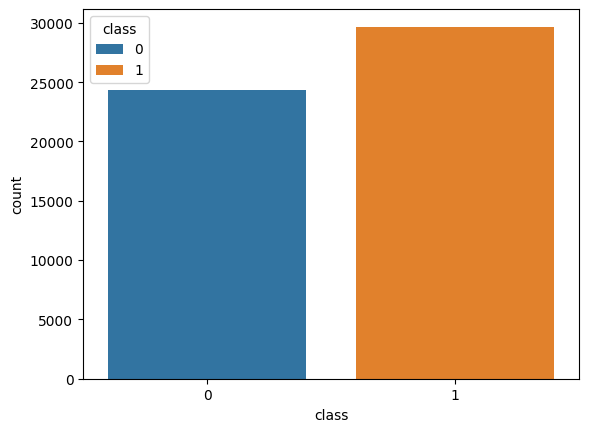

In [7]:
sns.countplot(data=df,x="class", hue="class")

<Axes: >

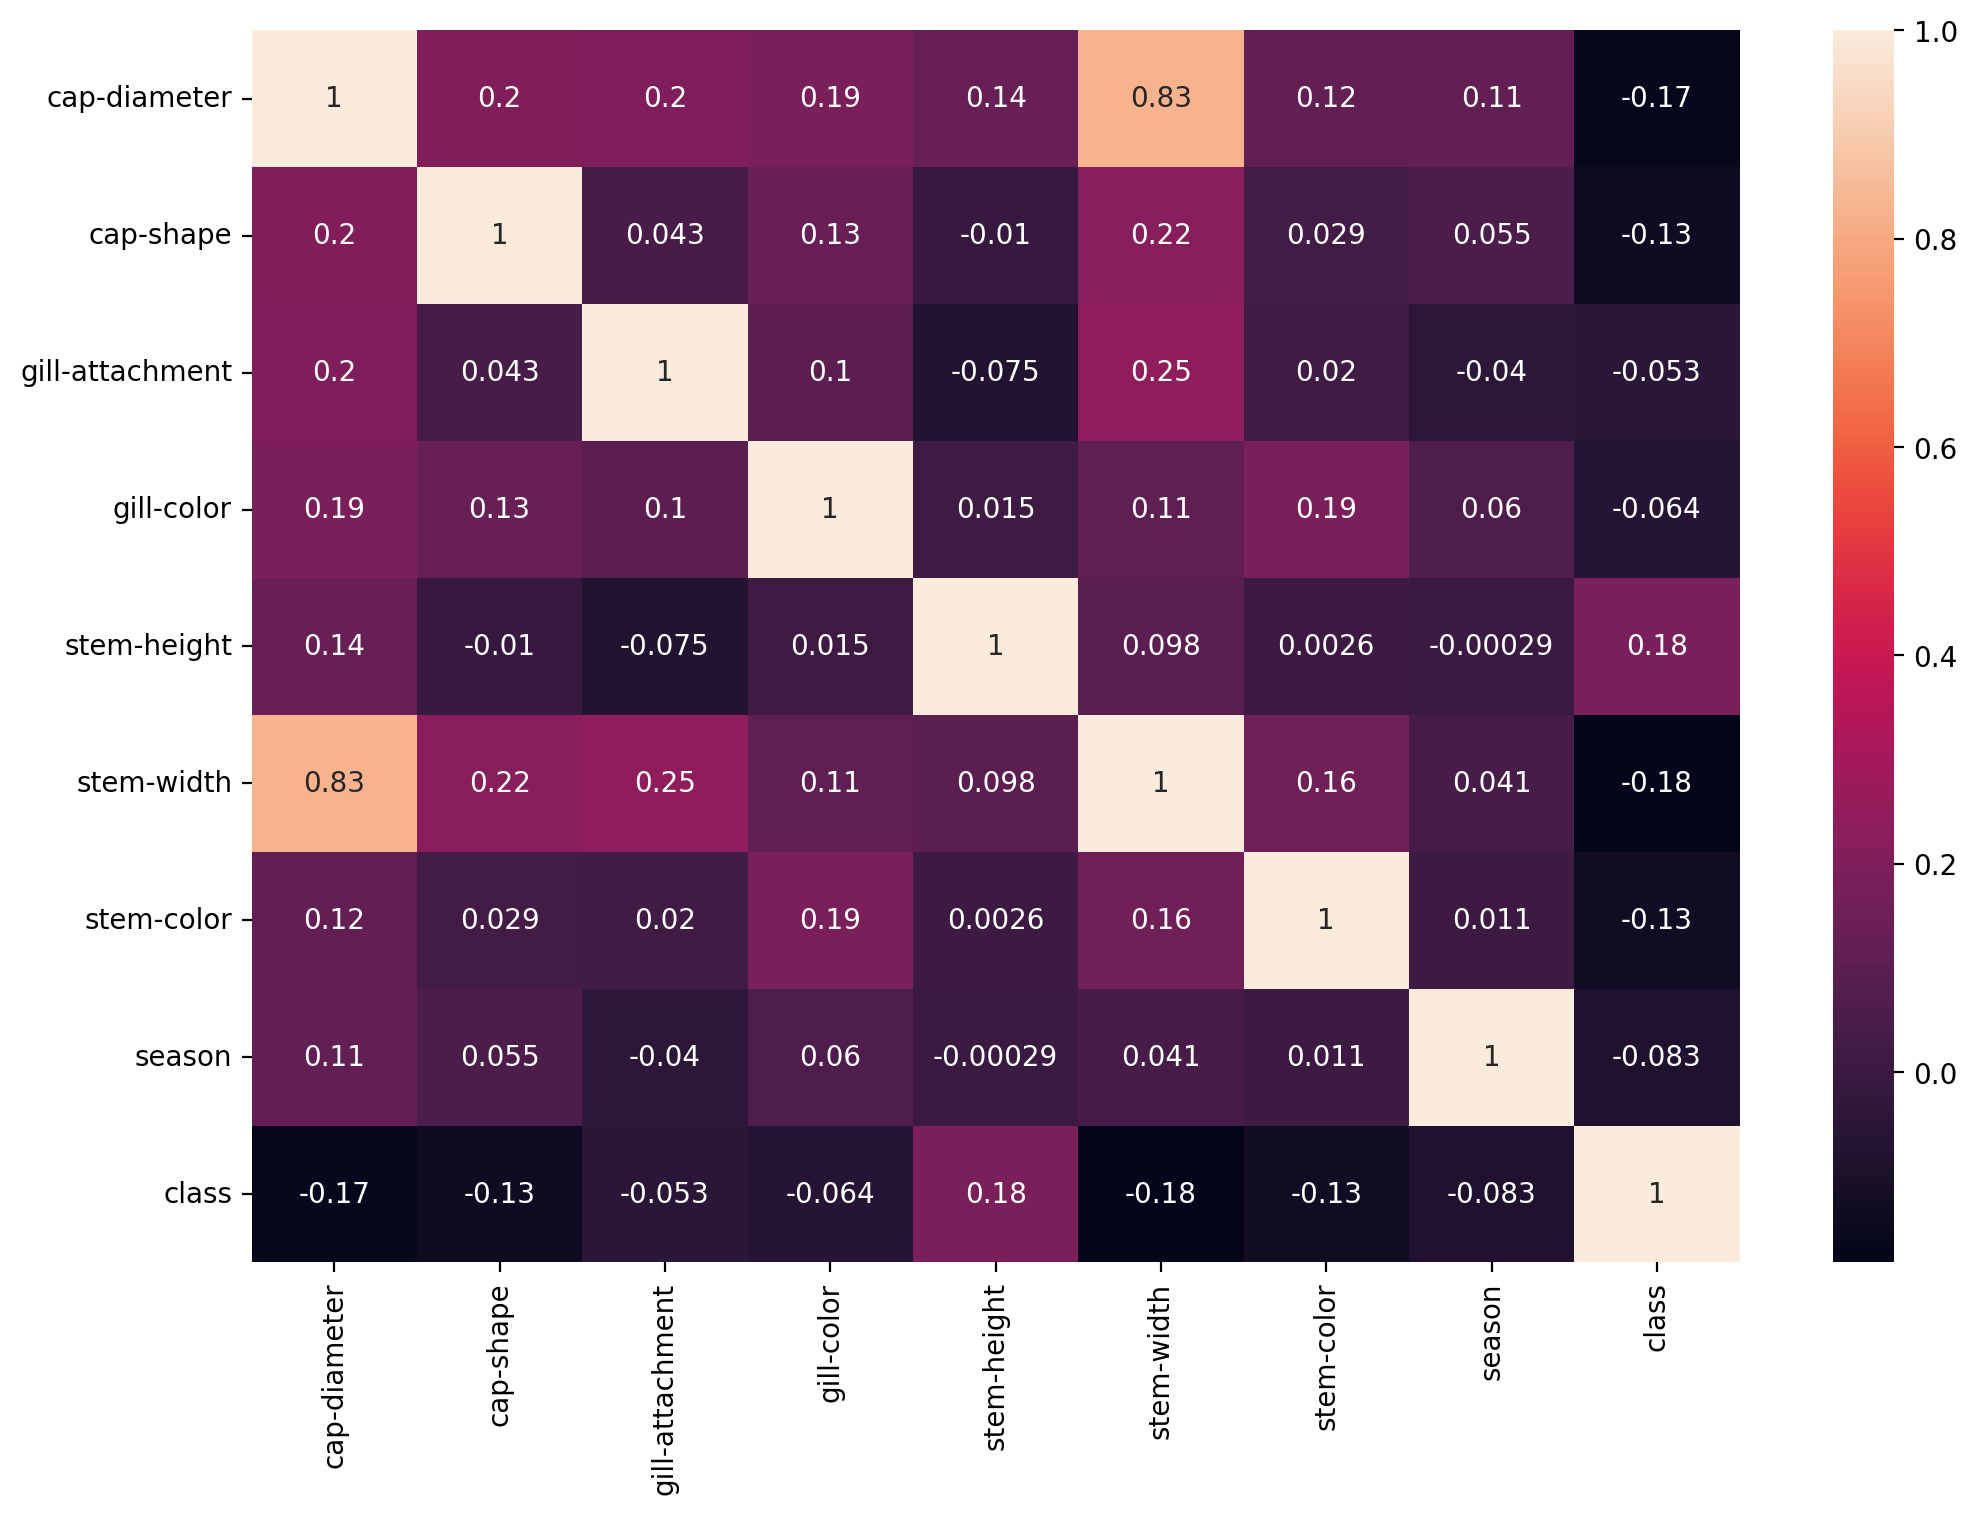

In [8]:
plt.figure(figsize=(12,8), dpi=200)
sns.heatmap(df.corr(), annot=True)

In [9]:
df.corr()["class"].sort_values()

stem-width        -0.182856
cap-diameter      -0.165676
cap-shape         -0.133338
stem-color        -0.128339
season            -0.082919
gill-color        -0.063947
gill-attachment   -0.052541
stem-height        0.183354
class              1.000000
Name: class, dtype: float64

In [10]:
X = df.drop("class",axis=1)
y = df["class"]

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, roc_auc_score, precision_score

In [13]:
def run_model(model):
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    roc_auc = roc_auc_score(y_test,y_pred)
    
    results = pd.DataFrame({
        "Model":[model.__class__.__name__],
        "Accuracy":[accuracy],
        "Recall":[recall],
        "Precision":[precision],
        "F1":[f1],
        "Roc_auc":[roc_auc]
    })
    return results

In [14]:
model1 = run_model(SVC())
model2 = run_model(RandomForestClassifier())
model3 = run_model(LogisticRegressionCV())
model4 = run_model(KNeighborsClassifier())
model5 = run_model(GradientBoostingClassifier())
model6 = run_model(DecisionTreeClassifier())
model7 = run_model(AdaBoostClassifier())

In [15]:
models = [model1,model2,model3,model4,model5,model6,model7]
combined_df = model1

for model_df in models[1:]:
    combined_df = pd.concat([combined_df, model_df], ignore_index=True)

combined_df = combined_df.sort_values(by="Accuracy")
combined_df

,Model,Accuracy,Recall,Precision,F1,Roc_auc
2,LogisticRegressionCV,0.638764,0.725837,0.655375,0.688809,0.628917
6,AdaBoostClassifier,0.752020,0.791130,0.766244,0.778488,0.747597
4,GradientBoostingClassifier,0.884523,0.891589,0.898026,0.894796,0.883724
0,SVC,0.904016,0.915892,0.910386,0.913131,0.902673
5,DecisionTreeClassifier,0.976497,0.978161,0.979148,0.978654,0.976309
3,KNeighborsClassifier,0.987354,0.991264,0.985854,0.988552,0.986912
1,RandomForestClassifier,0.990377,0.991040,0.991485,0.991262,0.990302


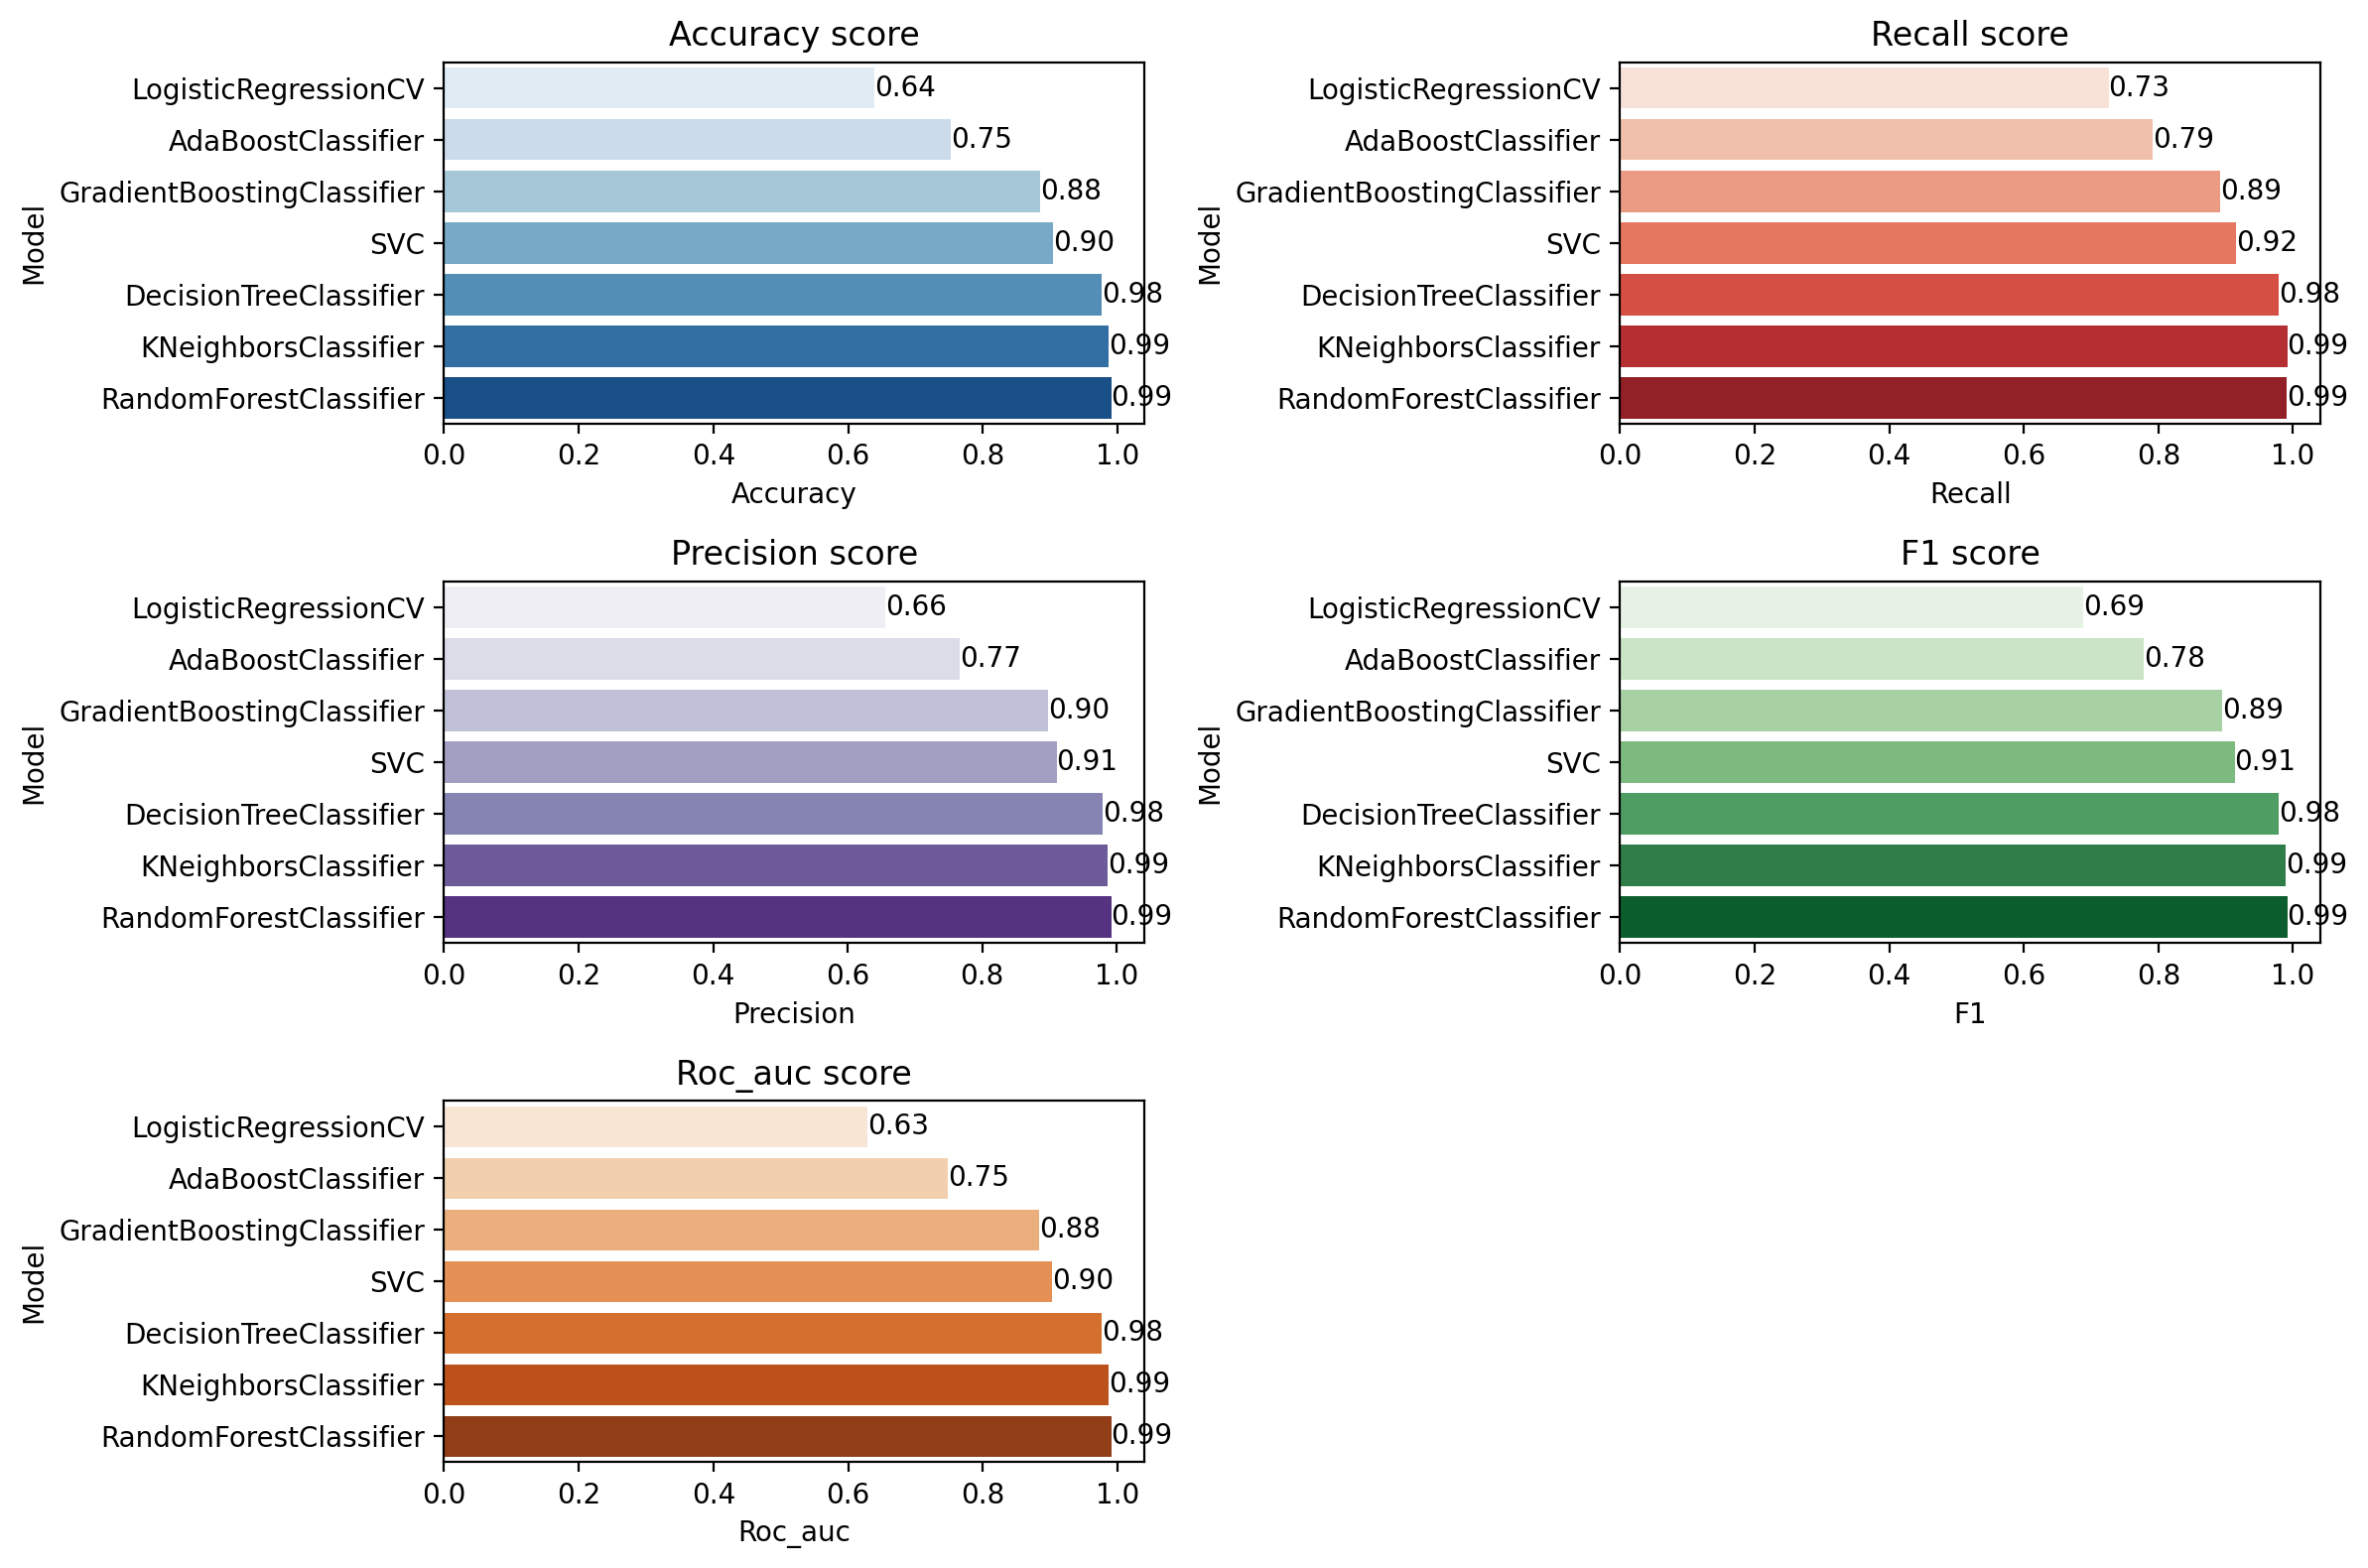

In [16]:
metrics = [
    ("Accuracy", "Blues"),
    ("Recall", "Reds"),
    ("Precision", "Purples"),
    ("F1", "Greens"),
    ("Roc_auc", "Oranges")
]

plt.figure(figsize=(12,8),dpi=200)

for idx, (metric, palette) in enumerate(metrics, 1):
    ax = plt.subplot(3,2,idx)
    sns.barplot(data=combined_df, x=metric, y="Model", palette=palette)
    plt.title(f"{metric} score")
    for container in ax.containers:
        ax.bar_label(container, fmt="%.2f", label_type="edge")

plt.tight_layout()
plt.show()